In [1]:
import math
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from numpy import log
import time

from keras.models import Sequential

from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

import matplotlib.pyplot as plt

from keras.layers import Dense, LeakyReLU
from keras.activations import elu
from keras.optimizers import Adam

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU, ELU

In [3]:
# Simulate stock prices using Geometric Brownian Motion
def simulate_gbm(S0, mu, sigma, T, dt):
    N = int(T / dt)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N) 
    W = np.cumsum(W) * np.sqrt(dt)  # standard Brownian motion
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)
    return t, S

class EuropeanOptionBS:
    def __init__(self, S, K, T, r, q, sigma, option_type="Call"):
        self.S = S
        self.K = K
        self.T = T
        self.r = r
        self.q = q
        self.sigma = sigma
        self.option_type = option_type
        
    def price(self):
        d1 = (math.log(self.S / self.K) + (self.r - self.q + 0.5 * self.sigma**2) * self.T) / (self.sigma * math.sqrt(self.T))
        d2 = d1 - self.sigma * math.sqrt(self.T)
        
        if self.option_type == "Call":
            price = (self.S * math.exp(-self.q * self.T) * norm.cdf(d1) -
                     self.K * math.exp(-self.r * self.T) * norm.cdf(d2))
        elif self.option_type == "Put":
            price = (self.K * math.exp(-self.r * self.T) * norm.cdf(-d2) -
                     self.S * math.exp(-self.q * self.T) * norm.cdf(-d1))
        return price

In [12]:

# Parameters
S0 = 1  # initial stock price
mu = 0.05  # drift
sigma = 0.2  # volatility
T = 1  # total time in years
dt =0.01  # time step
r_ = 0.05  # interest rates
#Strike = np.arange(100, 150, 10)  # strike price
Strike = 100
maturity = np.arange(0.1, 0.53, 0.1)  # time to maturity
volatility = np.arange(0.1, 2.1, 0.1)  # volatilities



# Simulate stock prices
t, stock_price = simulate_gbm(S0, mu, sigma, T, dt)

# Create dataset
data1 = []

#for Strike_ in Strike:
for T_ in maturity:
            for sigma_ in volatility:
                for S_ in stock_price:
                    pricee = EuropeanOptionBS(S_, 100, T_, r_, 0, sigma_, "Call").price()

                    data1.append([r_, Strike_, T_, sigma_, pricee])

# Convert data to numpy array
data1 = np.asarray(data)

In [4]:

# Parameters
S0 = 1  # initial stock price
mu = 0.05  # drift
sigma = 0.2  # volatility
T = 1  # total time in years
dt =0.01  # time step
r_ = 0.05  # interest rates
Strike = np.arange(100, 150, 10)  # strike price

maturity = np.arange(0.1, 0.53, 0.1)  # time to maturity
volatility = np.arange(0.1, 2.1, 0.1)  # volatilities



# Simulate stock prices
t, stock_price = simulate_gbm(S0, mu, sigma, T, dt)

# Create dataset
data = []

for Strike_ in Strike:
        for T_ in maturity:
            for sigma_ in volatility:
                for S_ in stock_price:
                    price = EuropeanOptionBS(S_, Strike_, T_, r_, 0, sigma_, "Call").price()
                    option_stock_ratio = price / S_
                    strike_stock_ratio = Strike_ / S_
                    data.append([r_, strike_stock_ratio, T_, sigma_, log(option_stock_ratio)])

# Convert data to numpy array
data = np.asarray(data)

C:\Users\spin 3\AppData\Local\Temp\ipykernel_33416\1554788282.py:27: RuntimeWarning: divide by zero encountered in log
  data.append([r_, strike_stock_ratio, T_, sigma_, log(option_stock_ratio)])


In [3]:
# Dataset
r = np.arange(0.0, 0.1, 0.01)  # interest rates
Strike = np.arange(50, 155, 5)  # strike price
T = np.arange(0.1, 2.1, 0.1)  # time to maturity
sigma = np.arange(0.1, 2.1, 0.1)  # volatility
stock_price = 100

data = []
for r_ in r:
    for Strike_ in Strike:
        for T_ in T:
            for sigma_ in sigma:
                price = EuropeanOptionBS(100, Strike_, T_, r_, 0, sigma_, "Call").price
                
                
                option_stock_ratio = price / stock_price
                strike_stock_ratio = Strike_ / stock_pricenn
                data.append([r_, strike_stock_ratio, T_, sigma_, option_stock_ratio])


data = np.asarray(data)

In [4]:

# Test and train datasets
X = data[:, :4]  # params r, strike, T, sigma
y = np.log(data[:, 4])  # call price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [5]:
print(y.size)

84000


In [6]:

# Function to create and compile model with given parameters
def create_model(neurons, activation_function):
    ANN = Sequential()
    
    # Adding the input layer
    ANN.add(Dense(neurons[0], input_dim=4))
    if activation_function == 'relu':
        ANN.add(Dense(neurons[0], activation='relu'))
    elif activation_function == 'elu':
        ANN.add(Dense(neurons[0], activation=elu))
    elif activation_function == 'leaky_relu':
        ANN.add(LeakyReLU())

    # Adding the hidden layers
    for neuron in neurons[1:]:
        ANN.add(Dense(neuron))
        if activation_function == 'relu':
            ANN.add(Dense(neuron, activation='relu'))
        elif activation_function == 'elu':
            ANN.add(Dense(neuron, activation=elu))
        elif activation_function == 'leaky_relu':
            ANN.add(LeakyReLU())

    # Adding the output layer
    ANN.add(Dense(1))

    # Compile the model
    ANN.compile(loss='mean_squared_error', optimizer='adam')
    
    return ANN



In [7]:
# List of neurons for each layer [10, 30, 60]
neurons = [10, 30, 60]

# List of activation functions to test
activation_functions = ['relu', 'elu', 'leaky_relu']

# Dictionary to store training histories and times
histories = {}
training_times = {}
y_pred1 = {}
for activation_function in activation_functions:
    print(f"Training with {activation_function} activation function")
    model = create_model(neurons, activation_function)
    
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0)
    end_time = time.time()
    
    histories[activation_function] = history
    training_times[activation_function] = end_time - start_time
    y_pred1[activation_function] = model.predict(X_test)
    




Training with relu activation function


C:\Users\spin 3\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step
Training with elu activation function
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step
Training with leaky_relu activation function
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step


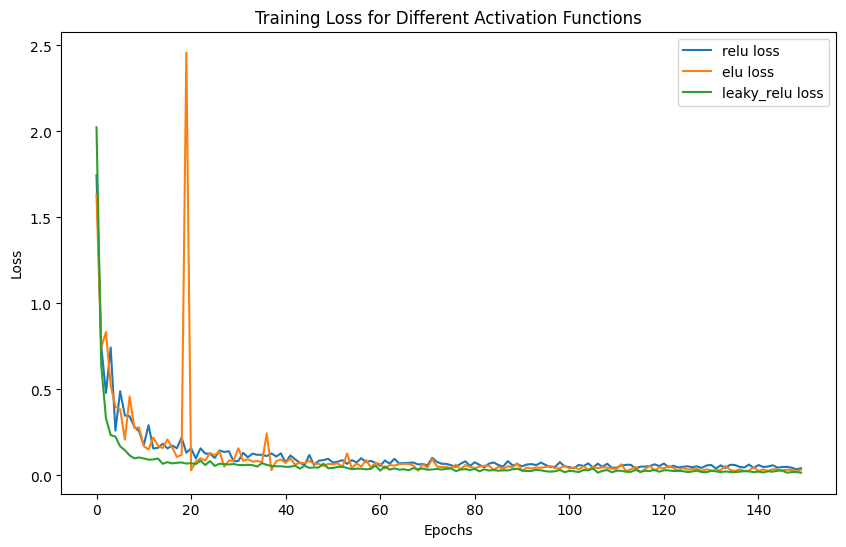

Training times (in seconds) for each activation function:
relu: 601.08 seconds
elu: 514.40 seconds
leaky_relu: 450.45 seconds


In [8]:
# Plotting the training loss for each activation function
plt.figure(figsize=(10, 6))
for activation_function in activation_functions:
    plt.plot(histories[activation_function].history['loss'], label=f'{activation_function} loss')
    
plt.title('Training Loss for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Printing the training times
print("Training times (in seconds) for each activation function:")
for activation_function in activation_functions:
    print(f"{activation_function}: {training_times[activation_function]:.2f} seconds")

In [9]:
for activation_function in activation_functions:
        final_loss = histories[activation_function].history['loss'][-1]
        print(f"  {activation_function}:  Last log loss: {final_loss:.4f}")

  relu:  Last log loss: 0.0421
  elu:  Last log loss: 0.0338
  leaky_relu:  Last log loss: 0.0160


In [13]:
for activation_function in activation_functions:
    y_pred = y_pred1[activation_function]
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test,y_pred)
    print(f"   MSA {activation_function}: {rmse:.10f}")
    print(f"   MAE {activation_function}: {mae :.10f}")
    print(f"   MSE {activation_function}: {mse :.10f}") 
    print("r-squared = {:.3f}".format(r2_score(y_test, y_pred)))

   MSA relu: 0.1767151401
   MAE relu: 0.0836341976
   MSE relu: 0.0312282407
r-squared = 0.995
   MSA elu: 0.1083006028
   MAE elu: 0.0338835149
   MSE elu: 0.0117290206
r-squared = 0.998
   MSA leaky_relu: 0.1537463752
   MAE leaky_relu: 0.1027546875
   MSE leaky_relu: 0.0236379479
r-squared = 0.996


In [3]:
# Define the neural network structure
model = Sequential()

# Input layer (implicitly defined by input_shape) and first hidden layer
model.add(Dense(30, input_dim=4))
model.add(LeakyReLU())
model.add(Dense(60))
model.add(ELU())
model.add(Dense(90))
model.add(LeakyReLU())
model.add(Dense(1))

# Output layer
#model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()

C:\Users\spin 3\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 60)             │         1,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu (ELU)                       │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 90)             │         5,490 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            91 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,591 (29.65 KB)

 Trainable params: 7,591 (29.65 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
start_time = time.time()

In [34]:

history = model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0)

In [35]:

end_time = time.time()
training_times = end_time - start_time
print(training_times)


419.8247826099396


In [36]:
final_loss = history.history['loss'][-1]
print(f"   Last log loss without log: {final_loss:.10f}")

   Last log loss without log: 0.0229546037


In [37]:
y_pred = model.predict(X_test)

657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step


In [38]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f"   MSA: {rmse:.10f}")
print(f"   MAE: {mae :.10f}")
print(f"   MSE: {mse :.10f}") 
print("r-squared = {:.3f}".format(r2_score(y_test, y_pred)))

   MSA: 0.0391828599
   MAE: 0.0205017824
   MSE: 0.0015352965
r-squared = 1.000


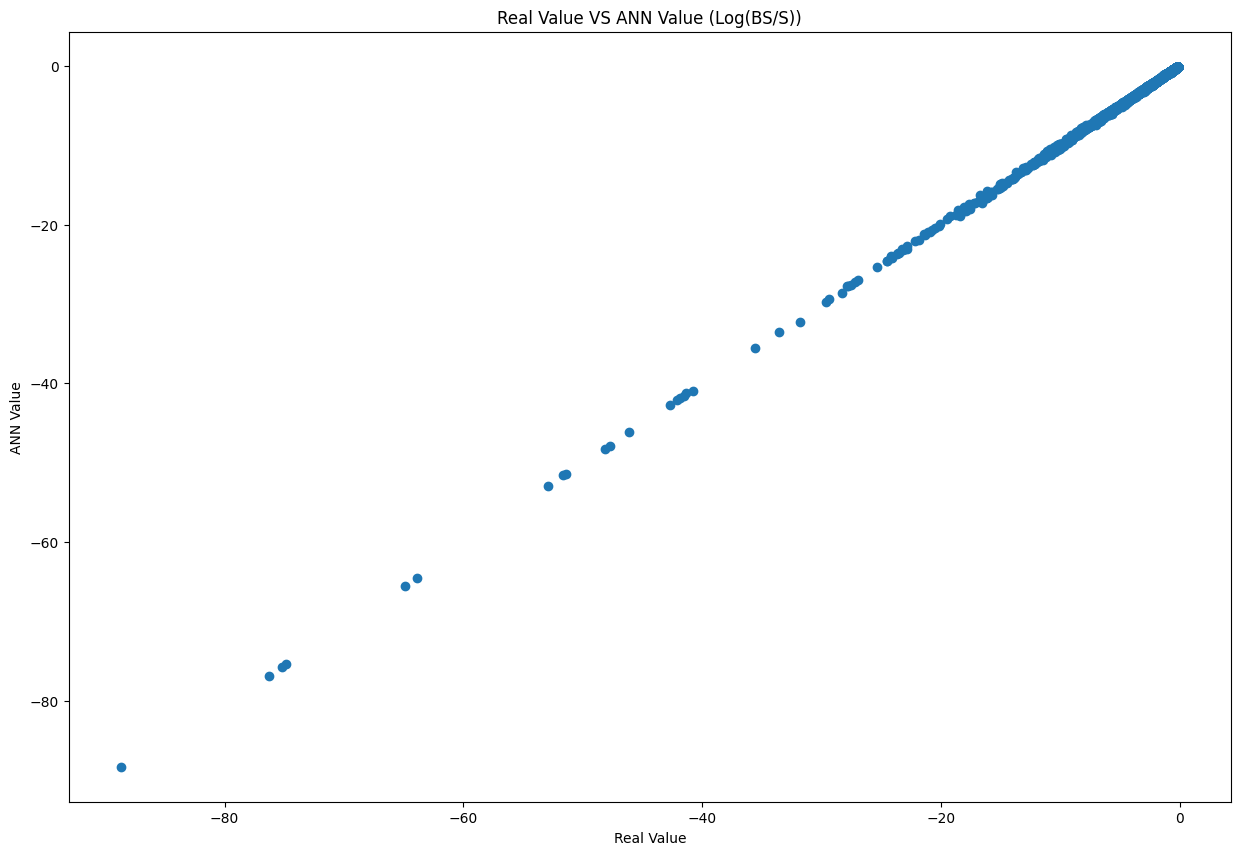

In [39]:

# Comparison of real values and predictions on the test dataset
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred)
plt.xlabel("Real Value")
plt.ylabel("ANN Value")
plt.annotate("r-squared = {:.3f}".format(r2_score(y_test, y_pred)), (20, 1), size=15)
plt.title('Real Value VS ANN Value (Log(BS/S))')
plt.show()

Training with epochs=50, batch_size=10


C:\Users\spin 3\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step


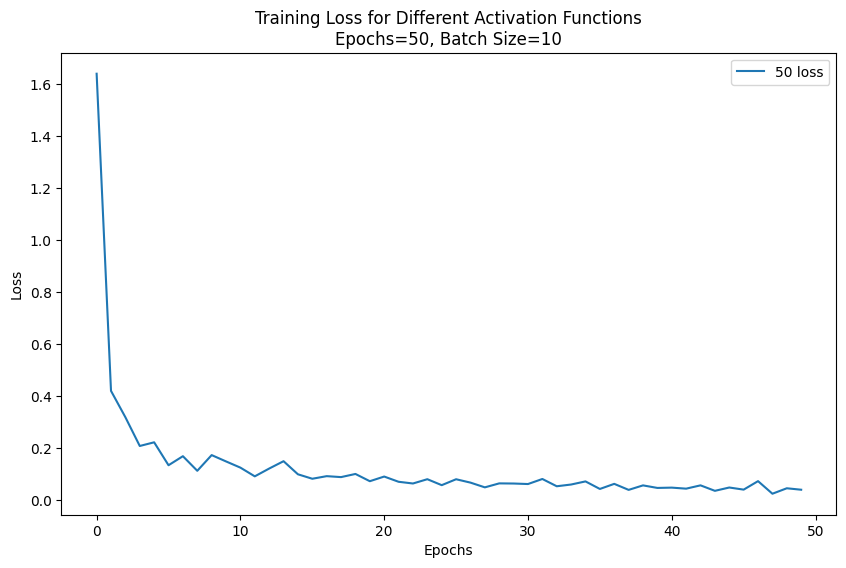

Training times (in seconds) for each activation function with epochs=50, batch_size=10:
  50:  Last log loss: 0.0400
  50: 214.36 seconds
   MSA epochs=50, batch_size=10: 0.0794052885
   MAE epochs=50, batch_size=10: 0.0356279838
   MSE epochs=50, batch_size=10: 0.0063051998
r-squared = 0.999
Training with epochs=50, batch_size=15


C:\Users\spin 3\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step


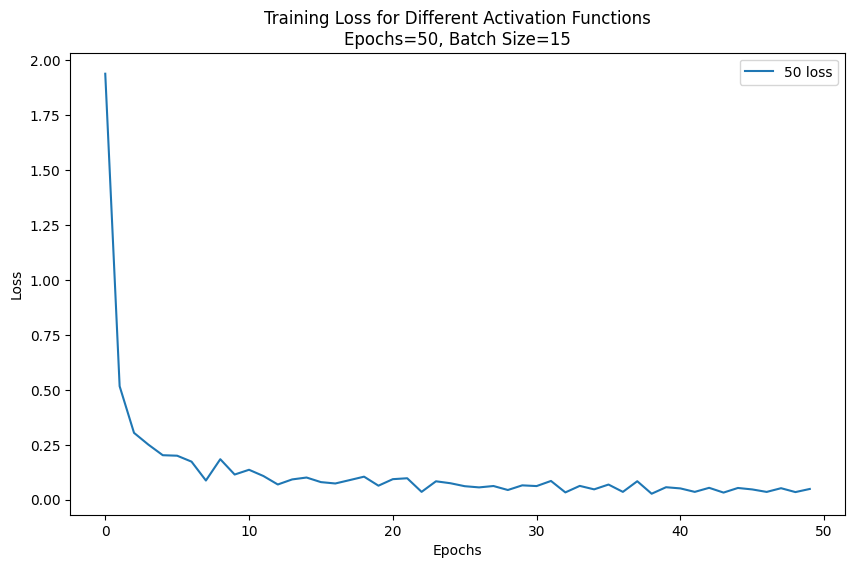

Training times (in seconds) for each activation function with epochs=50, batch_size=15:
  50:  Last log loss: 0.0483
  50: 154.30 seconds
   MSA epochs=50, batch_size=15: 0.1627351532
   MAE epochs=50, batch_size=15: 0.0827889869
   MSE epochs=50, batch_size=15: 0.0264827301
r-squared = 0.999
Training with epochs=50, batch_size=30


C:\Users\spin 3\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step


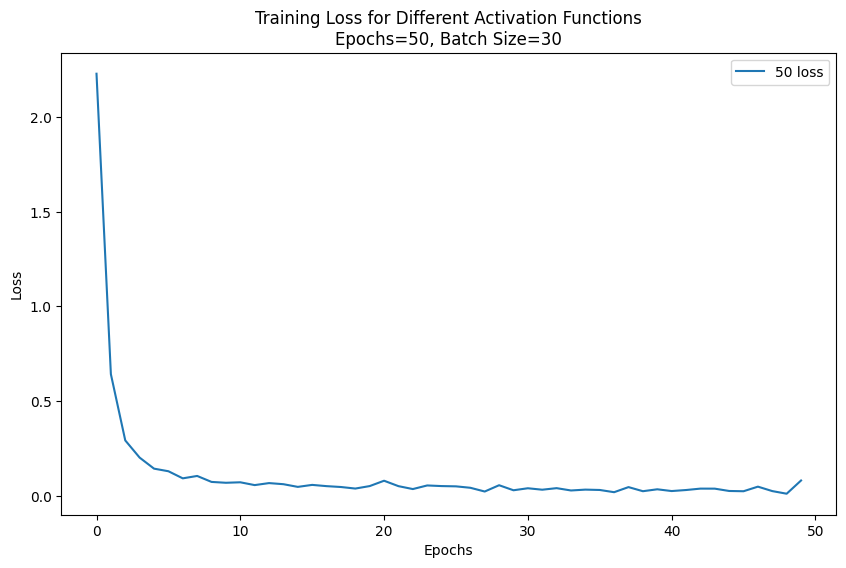

Training times (in seconds) for each activation function with epochs=50, batch_size=30:
  50:  Last log loss: 0.0825
  50: 83.73 seconds
   MSA epochs=50, batch_size=30: 0.0989151426
   MAE epochs=50, batch_size=30: 0.0410886799
   MSE epochs=50, batch_size=30: 0.0097842054
r-squared = 0.999
Training with epochs=50, batch_size=40


C:\Users\spin 3\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step


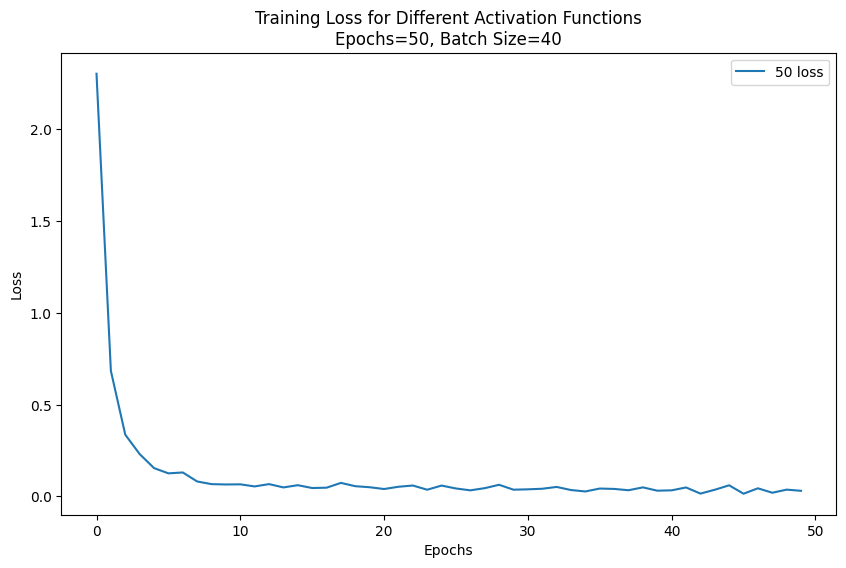

Training times (in seconds) for each activation function with epochs=50, batch_size=40:
  50:  Last log loss: 0.0306
  50: 60.22 seconds
   MSA epochs=50, batch_size=40: 0.1086478344
   MAE epochs=50, batch_size=40: 0.0413068724
   MSE epochs=50, batch_size=40: 0.0118043519
r-squared = 0.999
Training with epochs=100, batch_size=10


C:\Users\spin 3\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step


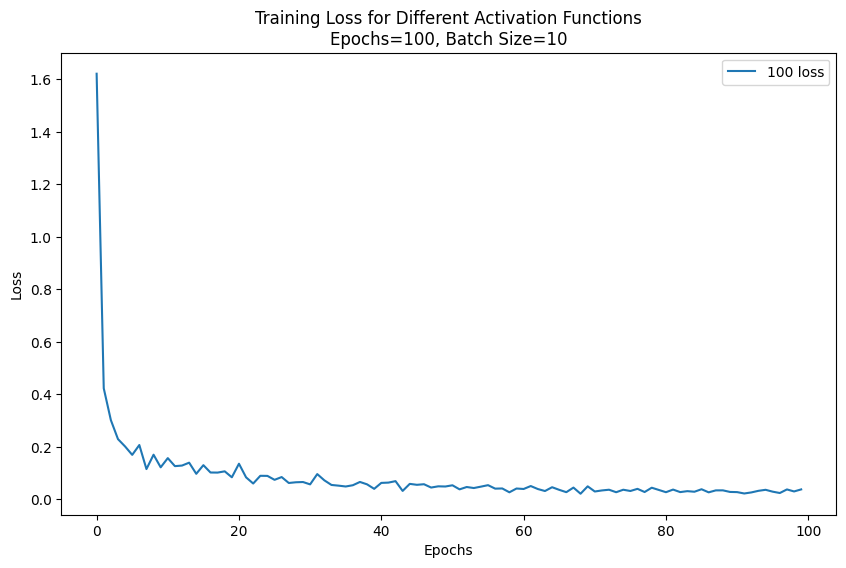

Training times (in seconds) for each activation function with epochs=100, batch_size=10:
  100:  Last log loss: 0.0381
  100: 447.00 seconds
   MSA epochs=100, batch_size=10: 0.1957005871
   MAE epochs=100, batch_size=10: 0.0542748963
   MSE epochs=100, batch_size=10: 0.0382987198
r-squared = 0.999
Training with epochs=100, batch_size=15


C:\Users\spin 3\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step


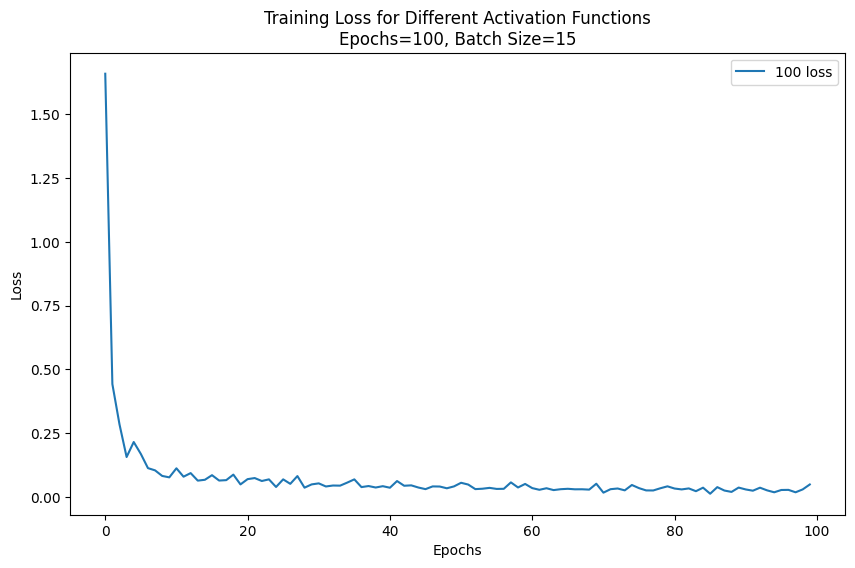

Training times (in seconds) for each activation function with epochs=100, batch_size=15:
  100:  Last log loss: 0.0492
  100: 303.00 seconds
   MSA epochs=100, batch_size=15: 0.0599261825
   MAE epochs=100, batch_size=15: 0.0269746863
   MSE epochs=100, batch_size=15: 0.0035911474
r-squared = 0.999
Training with epochs=100, batch_size=30


C:\Users\spin 3\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step


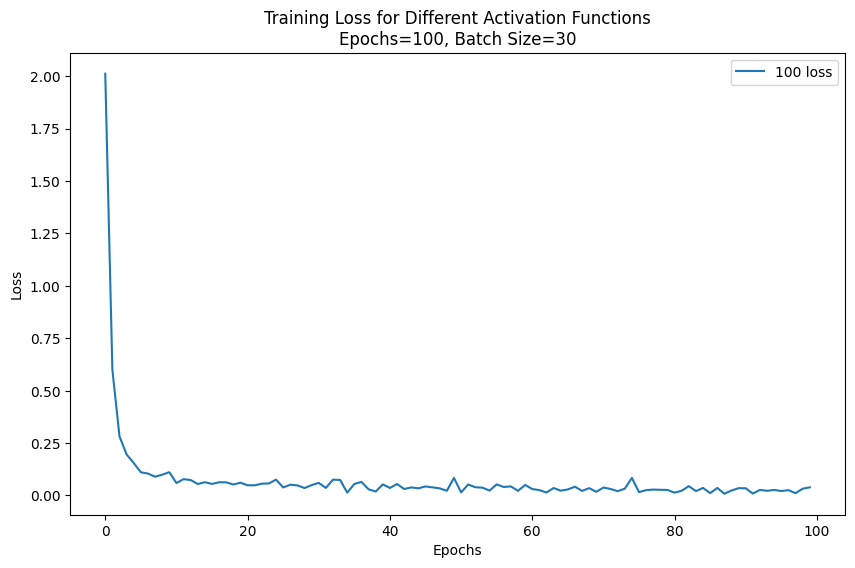

Training times (in seconds) for each activation function with epochs=100, batch_size=30:
  100:  Last log loss: 0.0386
  100: 161.08 seconds
   MSA epochs=100, batch_size=30: 0.0503997382
   MAE epochs=100, batch_size=30: 0.0246899571
   MSE epochs=100, batch_size=30: 0.0025401336
r-squared = 0.999
Training with epochs=100, batch_size=40


C:\Users\spin 3\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step


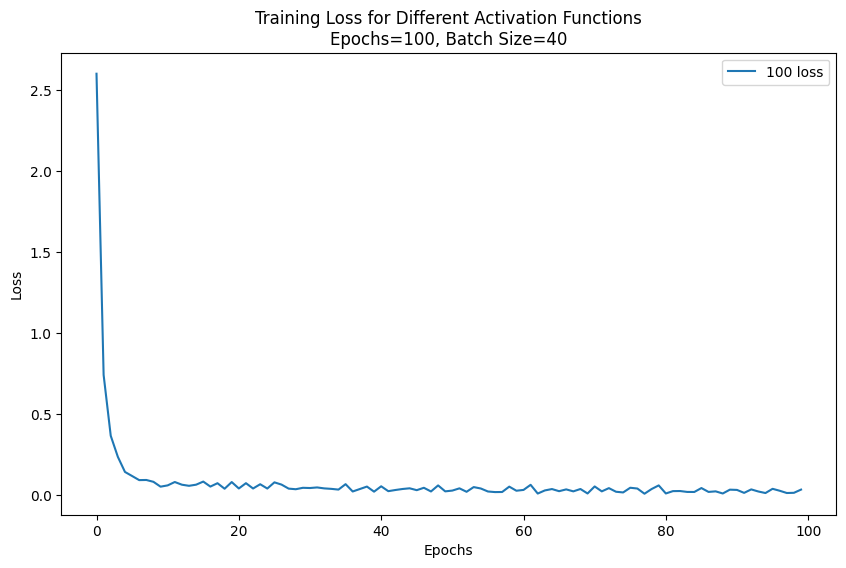

Training times (in seconds) for each activation function with epochs=100, batch_size=40:
  100:  Last log loss: 0.0335
  100: 117.98 seconds
   MSA epochs=100, batch_size=40: 0.0576319127
   MAE epochs=100, batch_size=40: 0.0315713208
   MSE epochs=100, batch_size=40: 0.0033214374
r-squared = 0.999
Training with epochs=150, batch_size=10


C:\Users\spin 3\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step


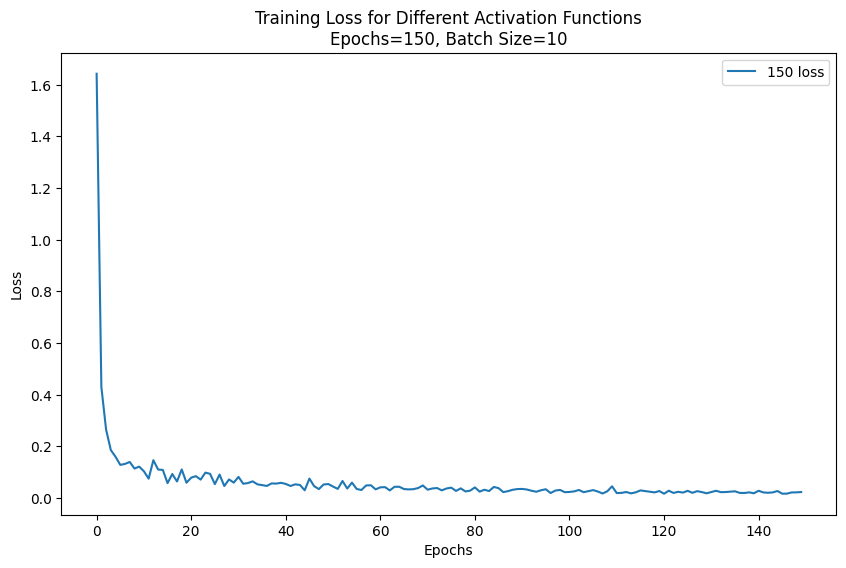

Training times (in seconds) for each activation function with epochs=150, batch_size=10:
  150:  Last log loss: 0.0230
  150: 663.50 seconds
   MSA epochs=150, batch_size=10: 0.1631650952
   MAE epochs=150, batch_size=10: 0.0460354152
   MSE epochs=150, batch_size=10: 0.0266228483
r-squared = 0.999
Training with epochs=150, batch_size=15


C:\Users\spin 3\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step


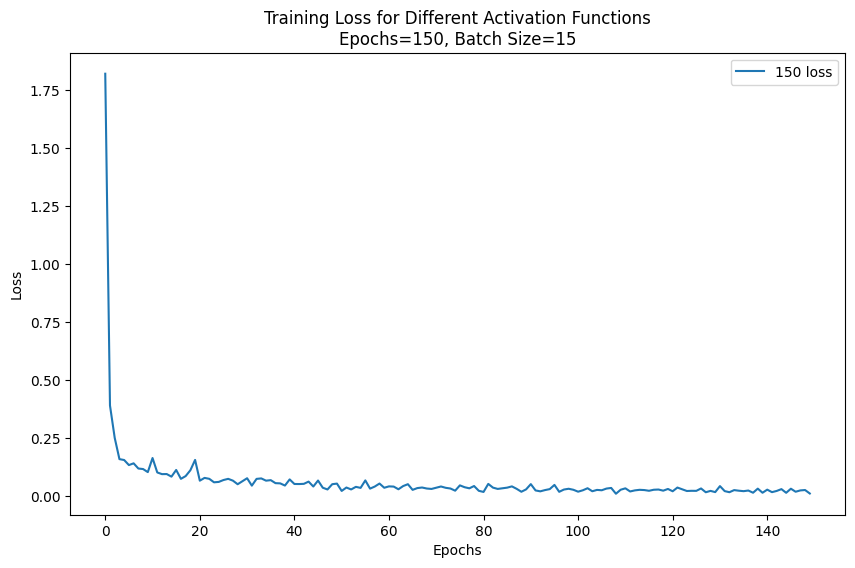

Training times (in seconds) for each activation function with epochs=150, batch_size=15:
  150:  Last log loss: 0.0106
  150: 2786.52 seconds
   MSA epochs=150, batch_size=15: 0.1172396561
   MAE epochs=150, batch_size=15: 0.0357658674
   MSE epochs=150, batch_size=15: 0.0137451370
r-squared = 0.999
Training with epochs=150, batch_size=30


C:\Users\spin 3\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step


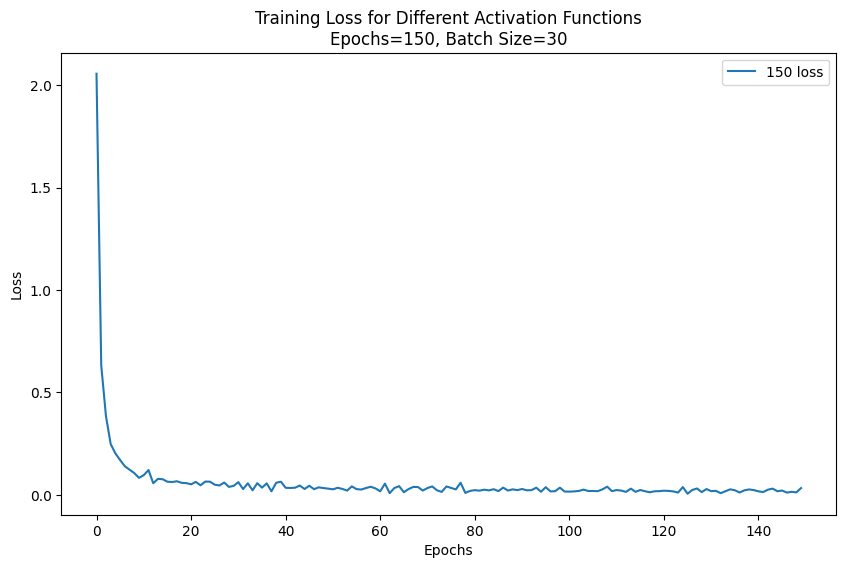

Training times (in seconds) for each activation function with epochs=150, batch_size=30:
  150:  Last log loss: 0.0326
  150: 223.23 seconds
   MSA epochs=150, batch_size=30: 0.0769538516
   MAE epochs=150, batch_size=30: 0.0464879092
   MSE epochs=150, batch_size=30: 0.0059218953
r-squared = 0.999
Training with epochs=150, batch_size=40


C:\Users\spin 3\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step


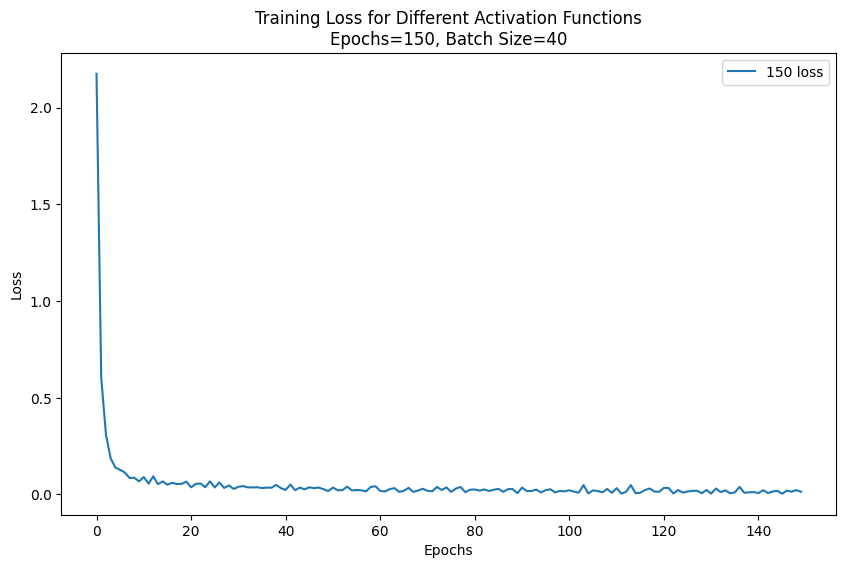

Training times (in seconds) for each activation function with epochs=150, batch_size=40:
  150:  Last log loss: 0.0133
  150: 177.32 seconds
   MSA epochs=150, batch_size=40: 0.1073368677
   MAE epochs=150, batch_size=40: 0.0534458519
   MSE epochs=150, batch_size=40: 0.0115212032
r-squared = 0.999


In [65]:
def test_different_epochs_and_batch_sizes(neurons, activation_functions, X_train, y_train):
    epochs_range = [50,100,150]  
    batch_sizes = [10,15,30,40]
    # Define the neural network structure


    
    for epochs in epochs_range:
        for batch_size in batch_sizes:
            print(f"Training with epochs={epochs}, batch_size={batch_size}")
            # Dictionary to store training histories and times
            histories2 = {}
            training_times2 = {}
            y_pred2 = {}
            model = Sequential()
            model.add(Dense(30, input_dim=4))
            model.add(LeakyReLU())
            model.add(Dense(60))
            model.add(ELU())
            model.add(Dense(90))
            model.add(LeakyReLU())
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mean_squared_error')

                
            start_time = time.time()
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
            end_time = time.time()
                
            histories2[epochs] = history
            training_times2[epochs] = end_time - start_time
            y_pred2 = model.predict(X_test)

            # Plotting the training loss for each activation function
            plt.figure(figsize=(10, 6))
           
            plt.plot(histories2[epochs].history['loss'], label=f'{epochs} loss')
                
            plt.title(f'Training Loss for Different Activation Functions\nEpochs={epochs}, Batch Size={batch_size}')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()
            plt.show()

            # Printing the training times
            print(f"Training times (in seconds) for each activation function with epochs={epochs}, batch_size={batch_size}:")

            final_loss = histories2[epochs].history['loss'][-1]
            print(f"  {epochs}:  Last log loss: {final_loss:.4f}")
            print(f"  {epochs}: {training_times2[epochs]:.2f} seconds")
            


            rmse = np.sqrt(mean_squared_error(y_test,y_pred2))
            mae = mean_absolute_error(y_test, y_pred2)
            mse = mean_squared_error(y_test,y_pred2)
            print(f"   MSA epochs={epochs}, batch_size={batch_size}: {rmse:.10f}")
            print(f"   MAE epochs={epochs}, batch_size={batch_size}: {mae :.10f}")
            print(f"   MSE epochs={epochs}, batch_size={batch_size}: {mse :.10f}") 
            print("r-squared = {:.3f}".format(r2_score(y_test, y_pred)))       

# Run the test function
test_different_epochs_and_batch_sizes(neurons, activation_functions, X_train, y_train)

In [44]:
# Define the neural network structure
model = Sequential()

# Input layer (implicitly defined by input_shape) and first hidden layer
model.add(Dense(30, input_dim=4))
model.add(LeakyReLU())
model.add(Dense(60))
model.add(ELU())
model.add(Dense(90))
model.add(LeakyReLU())
model.add(Dense(1))

# Output layer
#model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 30)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 60)             │         1,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_6 (ELU)                     │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 90)             │         5,490 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            91 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,591 (29.65 KB)

 Trainable params: 7,591 (29.65 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
start_time = time.time()


In [67]:
history = model.fit(X_train, y_train, epochs=100, batch_size=15, verbose=0)

In [68]:
end_time = time.time()
training_times = end_time - start_time
print(training_times)

272.2763855457306


In [69]:
final_loss = history.history['loss'][-1]
print(f"   Last log loss without log: {final_loss:.10f}")

   Last log loss without log: 0.0149776964


In [70]:
y_pred = model.predict(X_test)

657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [71]:

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f"   MSA: {rmse:.10f}")
print(f"   MAE: {mae :.10f}")
print(f"   MSE: {mse :.10f}") 
print("r-squared = {:.3f}".format(r2_score(y_test, y_pred)))

   MSA: 0.1346091000
   MAE: 0.0632359179
   MSE: 0.0181196098
r-squared = 0.997


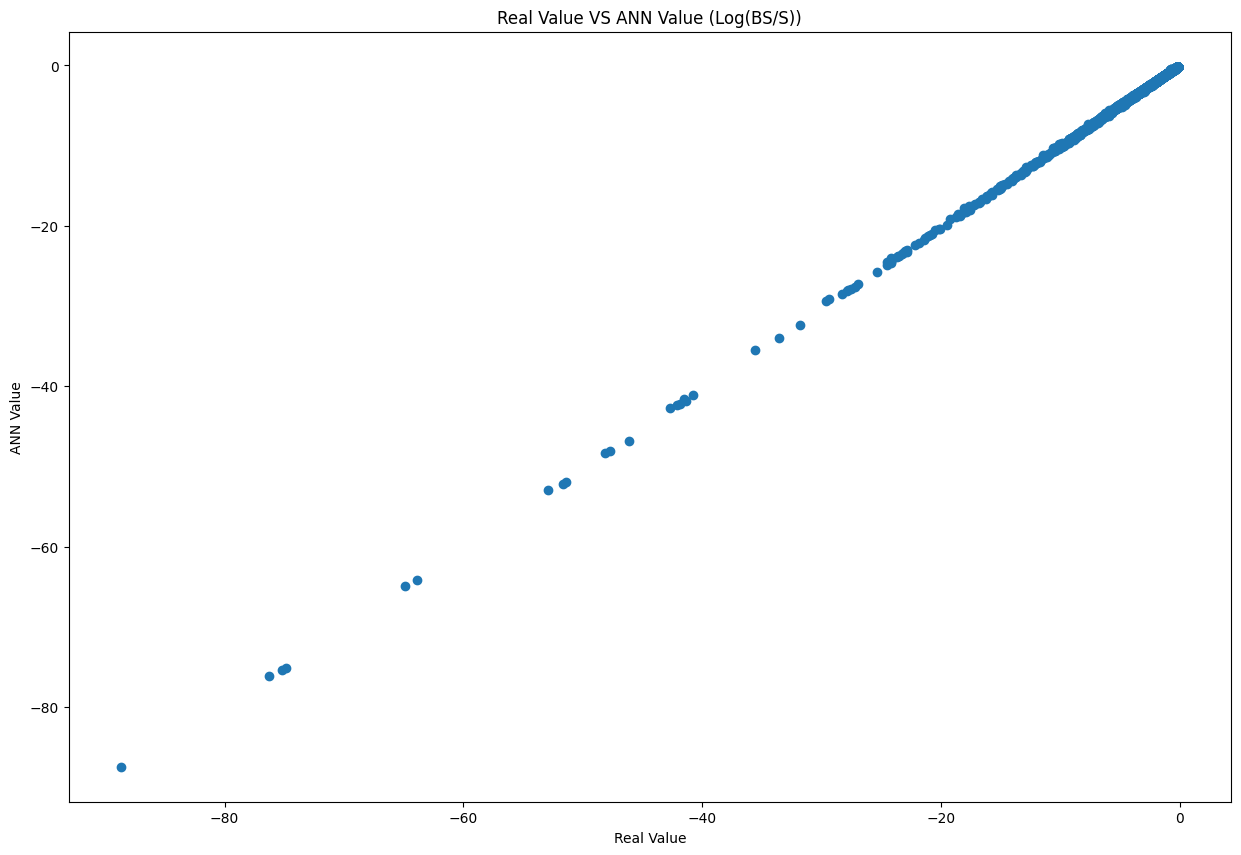

In [51]:

# Comparison of real values and predictions on the test dataset
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred)
plt.xlabel("Real Value")
plt.ylabel("ANN Value")
plt.annotate("r-squared = {:.3f}".format(r2_score(y_test, y_pred)), (20, 1), size=15)
plt.title('Real Value VS ANN Value (Log(BS/S))')
plt.show()

In [52]:
if np.any(y_pred == 0):
    print("There are zeros in y_pred")
else:
    print("There are no zeros in y_pred")

# Check if there are any zeros in y_test
if np.any(y_test == 0):
    print("There are zeros in y_test")
else:
    print("There are no zeros in y_test")

There are no zeros in y_pred
There are no zeros in y_test


In [53]:
data = np.column_stack((y_test, y_pred))
np.savetxt('y_test_y_pred.csv', data, delimiter=',', header='y_test,y_pred', comments='')

In [54]:
datafrac = pd.read_csv('y_test_y_pred.csv')

fractions statistics
Min: -0.4123813082602913
Max: 0.4022997432865907
Mean: 0.04541920860934305
Std: 0.05973865246308008


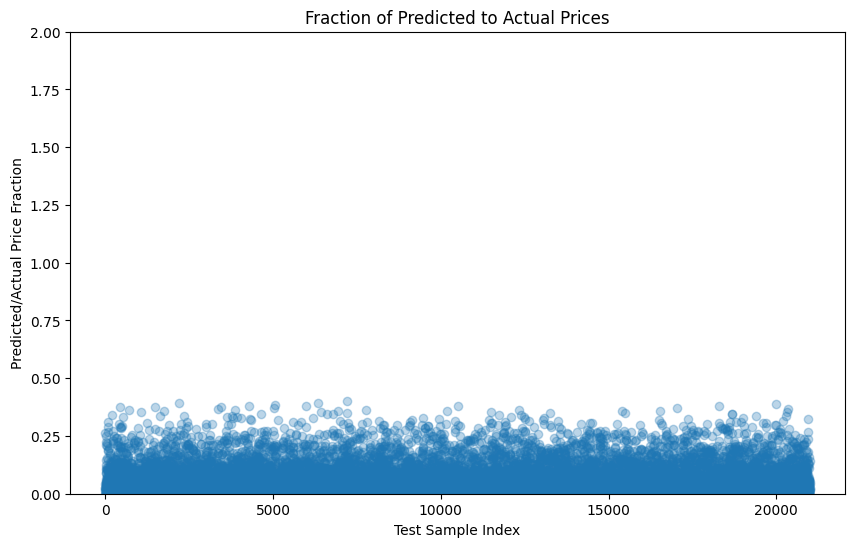

In [55]:
y_testf = datafrac['y_test'].values
y_predf = datafrac['y_pred'].values

# Calculate the fractions
fractionsf = y_predf / y_testf-1

# Print statistics for fractions
print("fractions statistics")
print("Min:", np.min(fractionsf))
print("Max:", np.max(fractionsf))
print("Mean:", np.mean(fractionsf))
print("Std:", np.std(fractionsf))

# Plot the fractions
plt.figure(figsize=(10, 6))
plt.plot(fractionsf, 'o', alpha=0.3)
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted/Actual Price Fraction')
plt.title('Fraction of Predicted to Actual Prices')
plt.ylim(0, 2)  # Limit the y-axis for better visualization if needed
plt.show()

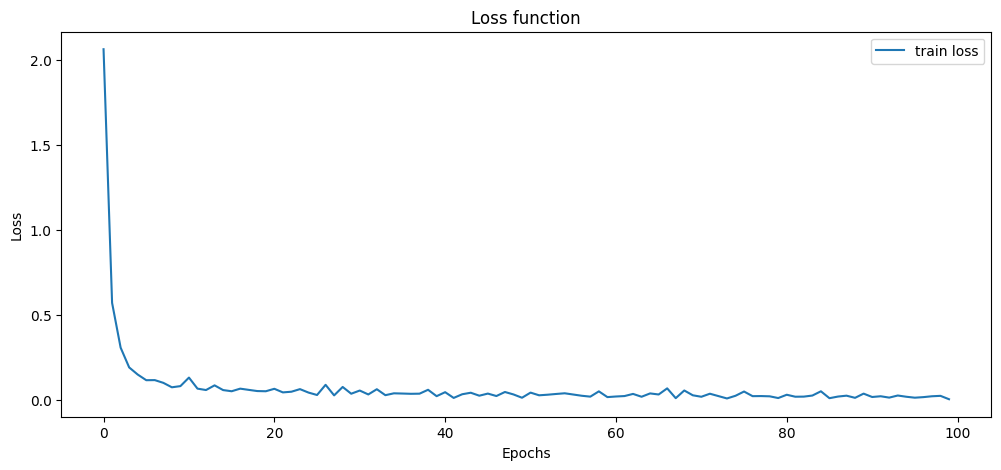

In [58]:
fig, ax = plt.subplots(figsize=(12, 5))
x_x = history.history["loss"]
ax.plot(history.history["loss"], label="train loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Loss function')
#ax.plot(history.history["accuracy"], label="train accuracy")
#ax.plot(history.history["val_loss"], label="validation loss")
#ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [38]:
print(stock_price.size)

200


In [43]:
# Simulate stock prices using Geometric Brownian Motion
def simulate_gbm(S0, mu, sigma, T, dt):
    N = int(T / dt)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N) 
    W = np.cumsum(W) * np.sqrt(dt)  # standard Brownian motion
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)
    return t, S



In [44]:
# Parameters
S0 = 100  # initial stock price
mu = 0.05  # drift
sigma = 0.2  # volatility
T = 1  # total time in years
dt =0.01  # time step
r_ = 0.05  # interest rates
Strike = np.arange(100, 150, 10)  # strike price
maturity = np.arange(0.1, 0.53, 0.1)  # time to maturity
volatility = np.arange(0.1, 2.1, 0.1)  # volatilities

In [5]:
class EuropeanOptionBS:
    def __init__(self, S, K, T, r, q, sigma, option_type="Call"):
        self.S = S
        self.K = K
        self.T = T
        self.r = r
        self.q = q
        self.sigma = sigma
        self.option_type = option_type
        
    def price(self):
        d1 = (math.log(self.S / self.K) + (self.r - self.q + 0.5 * self.sigma**2) * self.T) / (self.sigma * math.sqrt(self.T))
        d2 = d1 - self.sigma * math.sqrt(self.T)
        
        if self.option_type == "Call":
            price = (self.S * math.exp(-self.q * self.T) * norm.cdf(d1) -
                     self.K * math.exp(-self.r * self.T) * norm.cdf(d2))
        elif self.option_type == "Put":
            price = (self.K * math.exp(-self.r * self.T) * norm.cdf(-d2) -
                     self.S * math.exp(-self.q * self.T) * norm.cdf(-d1))
        return price

In [47]:
# Test and train datasets
X = data[:, :4]  # params r, strike/stock, T, sigma
y = data[:, 4]  # call price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [53]:
print(y.size)

50000


In [49]:
# Define the neural network structure
model = Sequential()

# Input layer (implicitly defined by input_shape) and first hidden layer
model.add(Dense(30, input_dim=4))
model.add(LeakyReLU())
model.add(Dense(60))
model.add(ELU())
model.add(Dense(90))
model.add(LeakyReLU())
model.add(Dense(1))

# Output layer
#model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()

C:\Users\spin 3\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 30)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 60)             │         1,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_2 (ELU)                     │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 90)             │         5,490 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            91 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,591 (29.65 KB)

 Trainable params: 7,591 (29.65 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history = model.fit(X_train, y_train, epochs=100, batch_size=15, verbose=0)

In [51]:
final_loss = history.history['loss'][-1]
print(f"   Last log loss log: {final_loss:.10f}")

   Last log loss without log: 0.0184218679


In [52]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f"   MSA: {rmse:.10f}")
print(f"   MAE: {mae :.10f}")
print(f"   MSE: {mse :.10f}") 
print("r-squared = {:.3f}".format(r2_score(y_test, y_pred)))

391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step
   MSA: 0.0365130543
   MAE: 0.0196634048
   MSE: 0.0013332031
r-squared = 1.000


In [54]:
# Parameters
S0 = 100  # initial stock price
mu = 0.05  # drift
sigma = 0.2  # volatility
T = 0.5  # total time in years
dt =0.01  # time step
r_ = 0.05  # interest rates
Strike = np.arange(100, 150, 10)  # strike price
maturity = np.arange(0.1, 0.53, 0.1)  # time to maturity
volatility = np.arange(0.1, 2.1, 0.1)  # volatilities

In [64]:
# Test and train datasets
X = data[:, :4]  # params r, strike/stock, T, sigma
y = data[:, 4]  # call price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [65]:
print(y.size)

25000


In [66]:
# Define the neural network structure
model = Sequential()

# Input layer (implicitly defined by input_shape) and first hidden layer
model.add(Dense(30, input_dim=4))
model.add(LeakyReLU())
model.add(Dense(60))
model.add(ELU())
model.add(Dense(90))
model.add(LeakyReLU())
model.add(Dense(1))

# Output layer
#model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()

C:\Users\spin 3\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 30)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 60)             │         1,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_4 (ELU)                     │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 90)             │         5,490 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            91 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,591 (29.65 KB)

 Trainable params: 7,591 (29.65 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
print(y.size)

25000


In [68]:
history = model.fit(X_train, y_train, epochs=100, batch_size=15, verbose=0)

In [69]:
final_loss = history.history['loss'][-1]
print(f"   Last log loss without log: {final_loss:.10f}")

   Last log loss without log: 0.0195896998


In [70]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f"   MSA: {rmse:.10f}")
print(f"   MAE: {mae :.10f}")
print(f"   MSE: {mse :.10f}") 
print("r-squared = {:.3f}".format(r2_score(y_test, y_pred)))

196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
   MSA: 0.0971215566
   MAE: 0.0459016570
   MSE: 0.0094325967
r-squared = 0.998


In [74]:
# Parameters
S0 = 100  # initial stock price
mu = 0.05  # drift
sigma = 0.2  # volatility
T = 0.25  # total time in years
dt =0.01  # time step
r_ = 0.05  # interest rates
Strike = np.arange(100, 150, 10)  # strike price
maturity = np.arange(0.1, 0.53, 0.1)  # time to maturity
volatility = np.arange(0.1, 2.1, 0.1)  # volatilities

In [79]:

# Test and train datasets
X = data[:, :4]  # params r, strike/stock, T, sigma
y = data[:, 4]  # call price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [80]:
print(y.size)

12500


In [81]:
# Define the neural network structure
model = Sequential()

# Input layer (implicitly defined by input_shape) and first hidden layer
model.add(Dense(30, input_dim=4))
model.add(LeakyReLU())
model.add(Dense(60))
model.add(ELU())
model.add(Dense(90))
model.add(LeakyReLU())
model.add(Dense(1))

# Output layer
#model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()

C:\Users\spin 3\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 30)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 60)             │         1,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_5 (ELU)                     │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 90)             │         5,490 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            91 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,591 (29.65 KB)

 Trainable params: 7,591 (29.65 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
history = model.fit(X_train, y_train, epochs=100, batch_size=15, verbose=0)

In [85]:
final_loss = history.history['loss'][-1]
print(f"   Last log loss : {final_loss:.10f}")

   Last log loss : 0.0381506458


In [86]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f"   MSA: {rmse:.10f}")
print(f"   MAE: {mae :.10f}")
print(f"   MSE: {mse :.10f}") 
print("r-squared = {:.3f}".format(r2_score(y_test, y_pred)))

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
   MSA: 0.1512633232
   MAE: 0.1065210879
   MSE: 0.0228805929
r-squared = 0.999
